In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the medical dataset
medical = pd.read_csv('medical_clean.csv')

In [2]:
# Check for duplicates in the dataset
print(medical.duplicated().value_counts())

# Identify missing values in each column
missing_values = medical.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

False    10000
Name: count, dtype: int64
Missing Values in Each Column:
CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services        

In [3]:
# Define a function to count outliers using IQR
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum()

# Select numeric columns for outlier detection
numeric_columns = medical.select_dtypes(include=['float64', 'int64'])

# Count outliers for each numeric column
count_outliers = numeric_columns.apply(count_outliers)

# Display the count of outliers
print(count_outliers)

CaseOrder               0
Zip                     0
Lat                   150
Lng                   237
Population            855
Children              411
Age                     0
Income                326
VitD_levels            60
Doc_visits              0
Full_meals_eaten        8
vitD_supp              70
Initial_days            0
TotalCharge             0
Additional_charges    424
Item1                 449
Item2                 429
Item3                 443
Item4                 450
Item5                 443
Item6                 443
Item7                 438
Item8                 442
dtype: int64



Column: Lat
Lower Whisker: 25.07153749999999
Upper Whisker: 52.22775750000001
Count of Outliers: 150


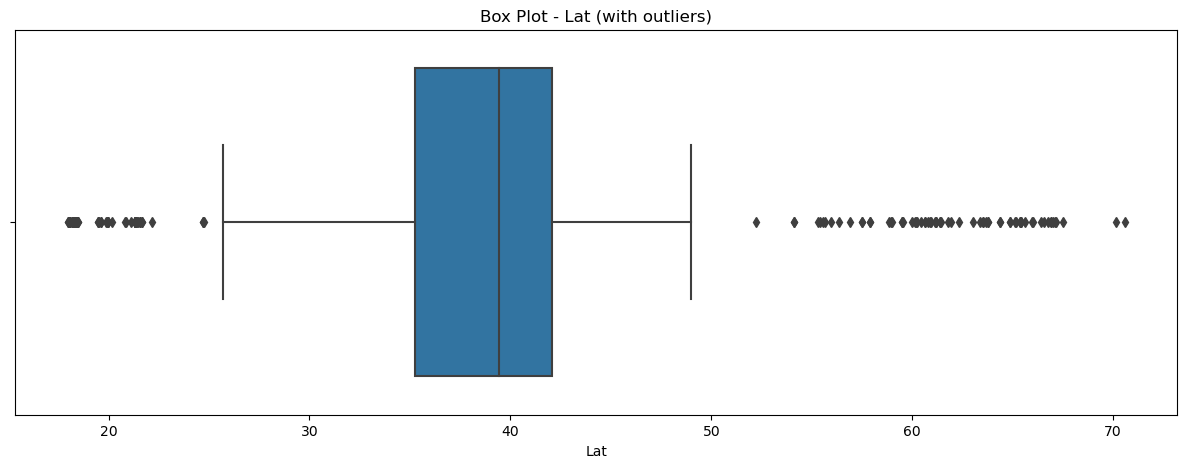


Column: Lng
Lower Whisker: -122.72538124999998
Upper Whisker: -55.065651250000016
Count of Outliers: 237


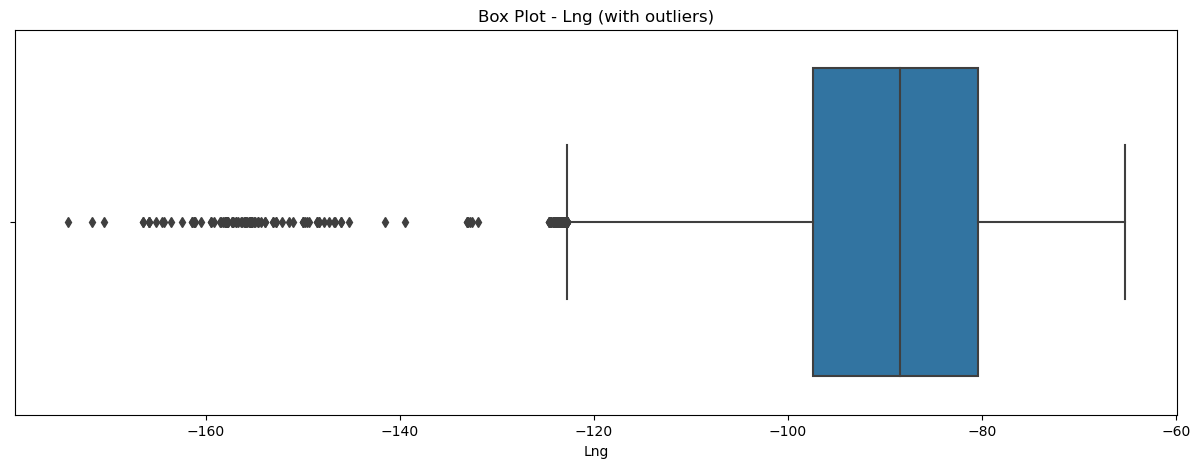


Column: Population
Lower Whisker: -19180.625
Upper Whisker: 33820.375
Count of Outliers: 855


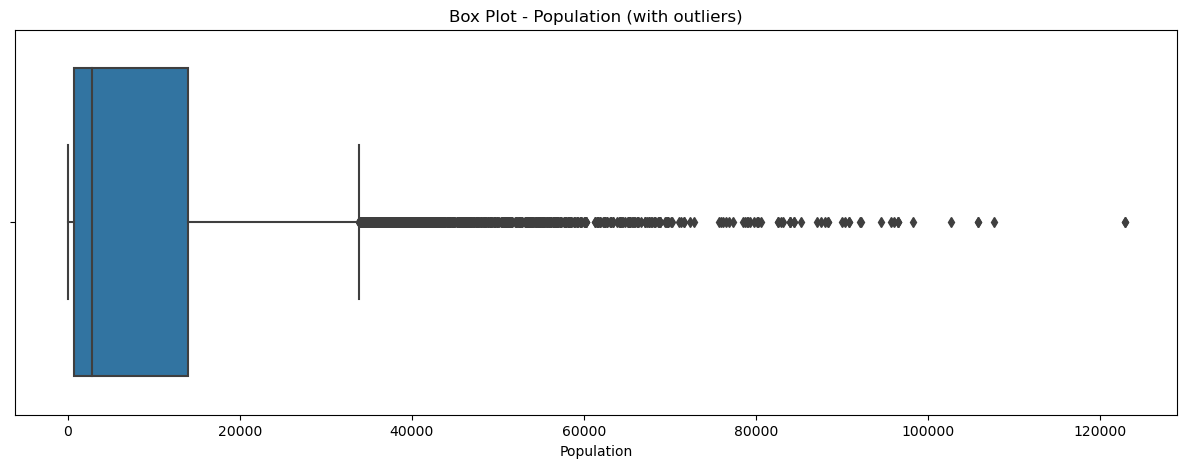


Column: Children
Lower Whisker: -4.5
Upper Whisker: 7.5
Count of Outliers: 411


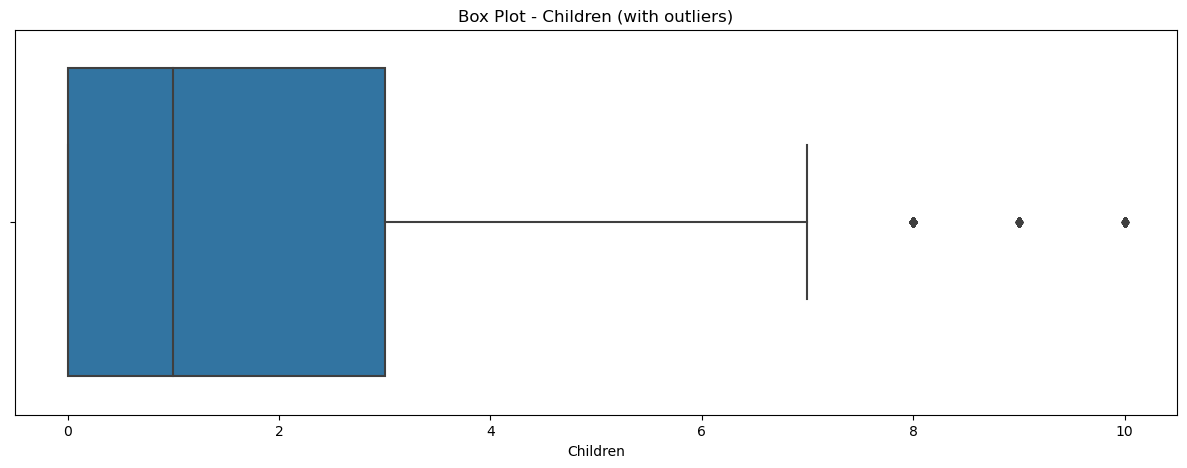


Column: Income
Lower Whisker: -32447.666249999987
Upper Whisker: 106342.84374999999
Count of Outliers: 326


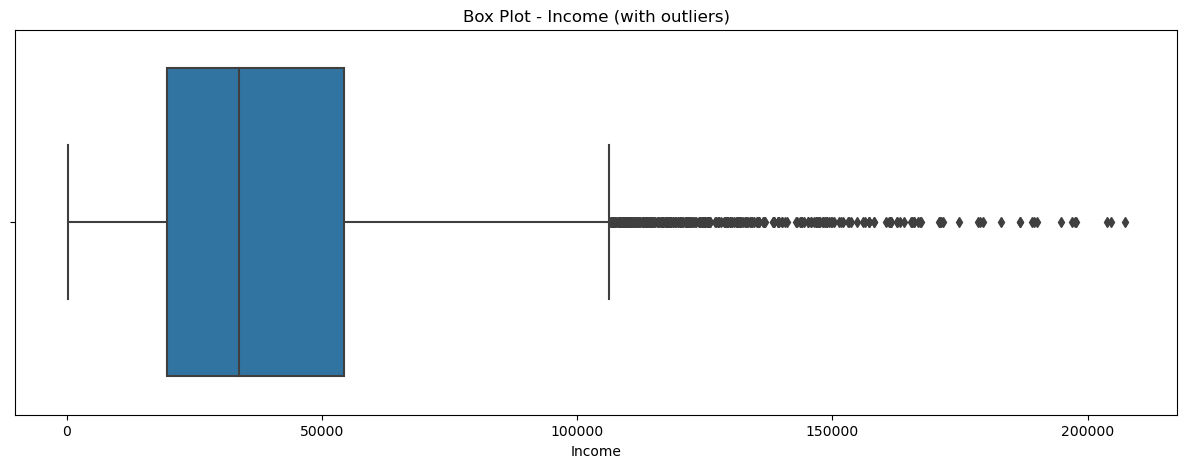


Column: VitD_levels
Lower Whisker: 12.544152781249997
Upper Whisker: 23.430248331250006
Count of Outliers: 60


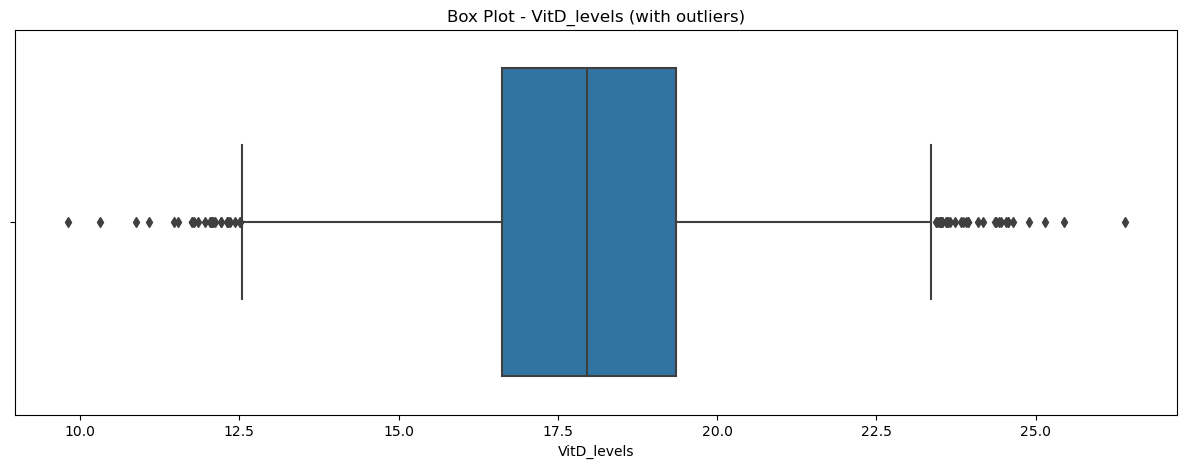


Column: Full_meals_eaten
Lower Whisker: -3.0
Upper Whisker: 5.0
Count of Outliers: 8


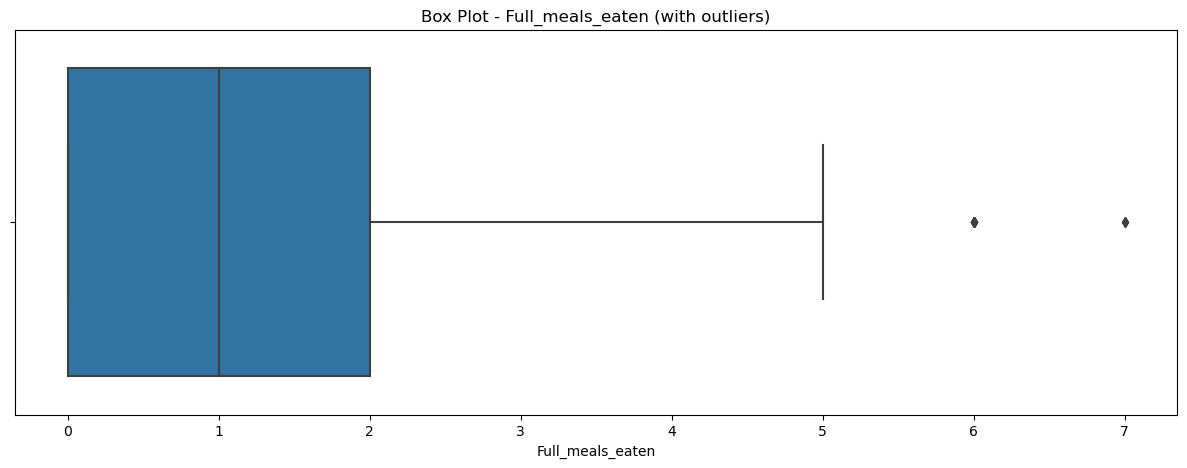


Column: vitD_supp
Lower Whisker: -1.5
Upper Whisker: 2.5
Count of Outliers: 70


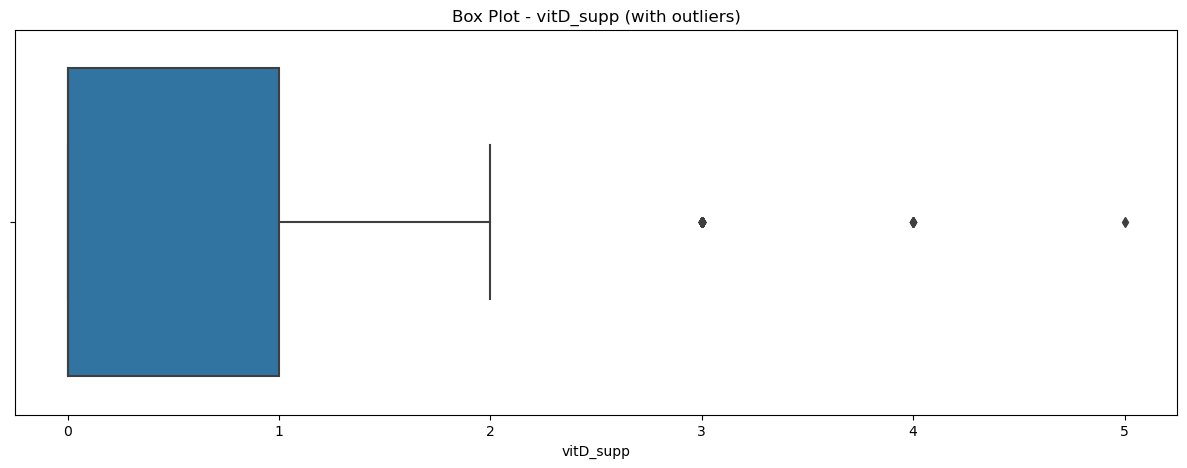


Column: Additional_charges
Lower Whisker: -3473.5156124999994
Upper Whisker: 27086.4933675
Count of Outliers: 424


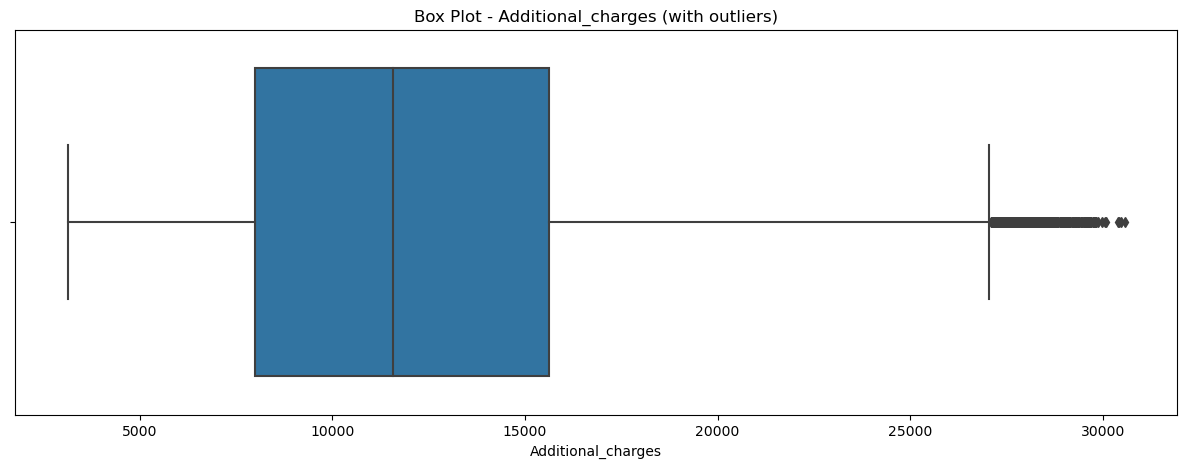


Column: Item1
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 449


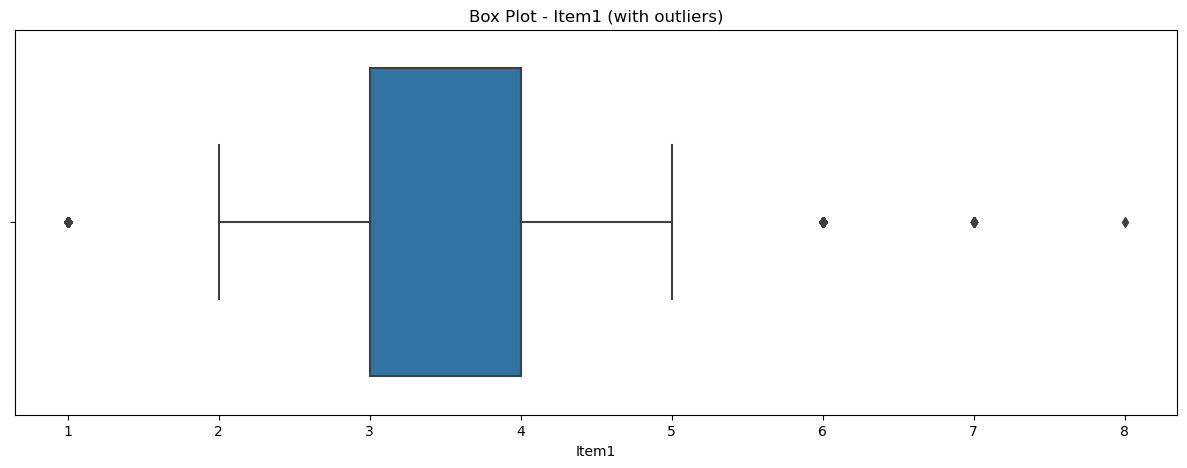


Column: Item2
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 429


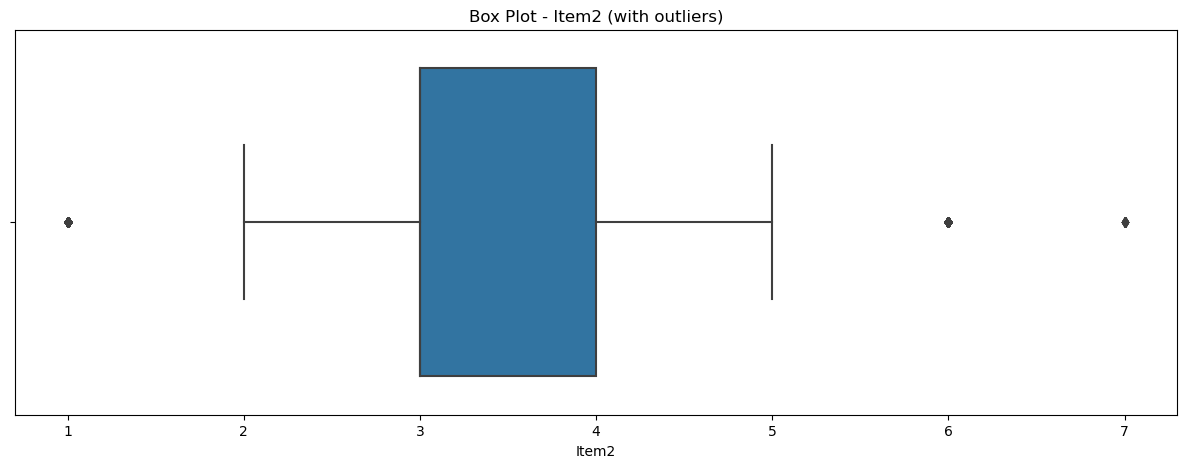


Column: Item3
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 443


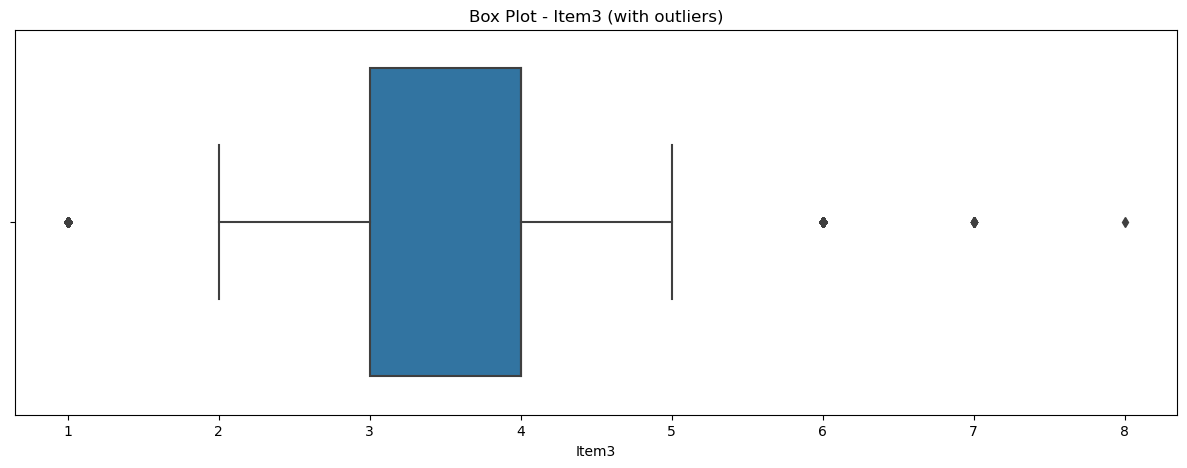


Column: Item4
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 450


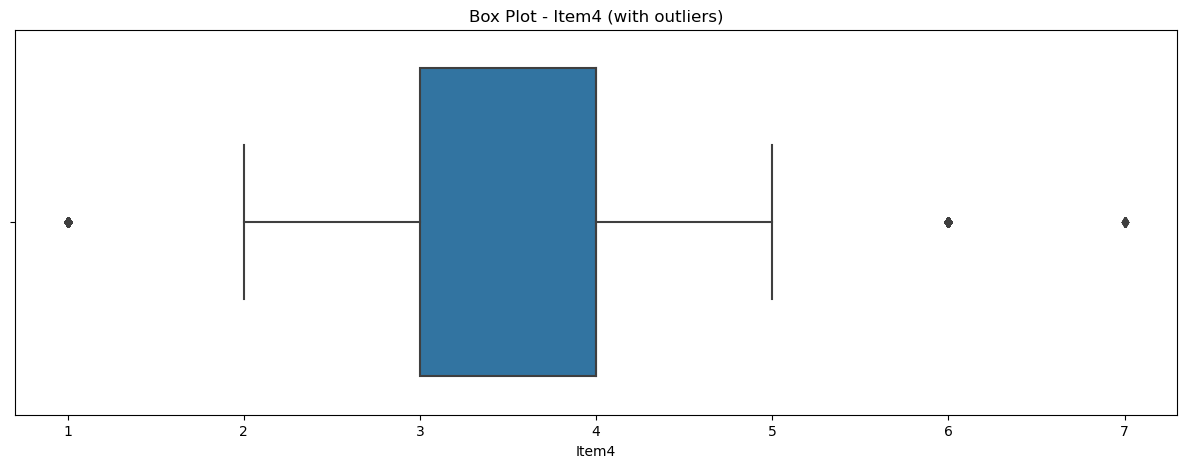


Column: Item5
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 443


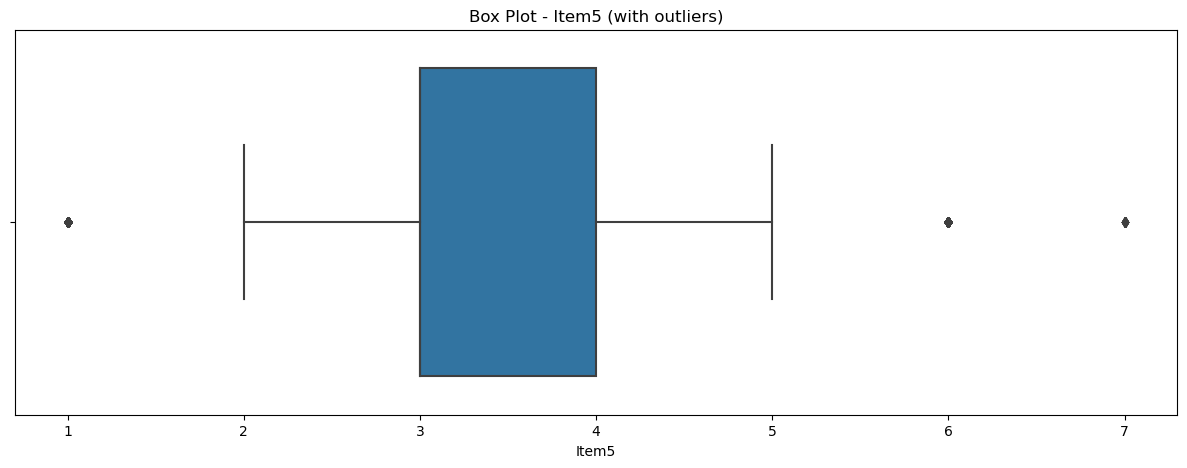


Column: Item6
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 443


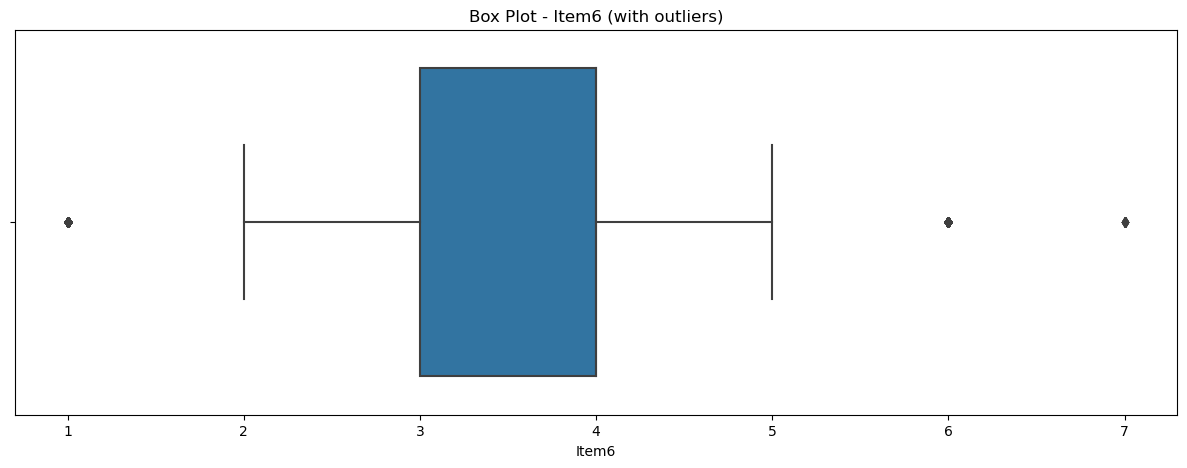


Column: Item7
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 438


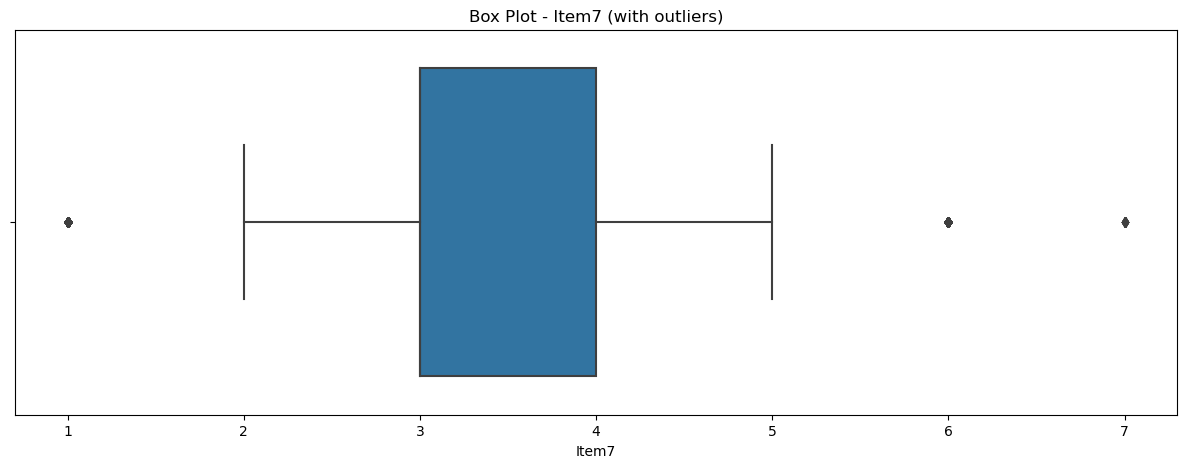


Column: Item8
Lower Whisker: 1.5
Upper Whisker: 5.5
Count of Outliers: 442


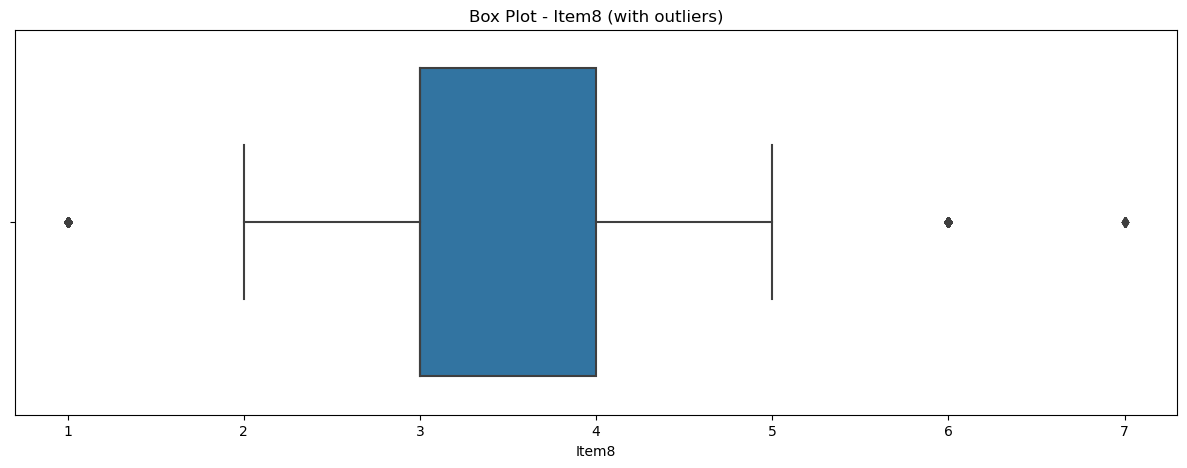

In [4]:
# Calculate descriptive statistics and identify outliers for specific columns of interest
columns_of_interest = ['Lat', 'Lng', 'Population', 'Children', 'Income', 'VitD_levels', 'Full_meals_eaten',
                       'vitD_supp', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
                       'Item5', 'Item6', 'Item7', 'Item8']

# Check if columns of interest exist in the DataFrame
for col in columns_of_interest:
    if col not in medical.columns:
        print(f"Column '{col}' does not exist in the DataFrame.")

# Calculate descriptive statistics for each column
stats = medical[columns_of_interest].describe()

# Identify columns with outliers
for col in columns_of_interest:
    q1 = stats.loc['25%', col]
    q3 = stats.loc['75%', col]
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    outliers = (medical[col] < lower_whisker) | (medical[col] > upper_whisker)
    print(f"\nColumn: {col}")
    print(f"Lower Whisker: {lower_whisker}")
    print(f"Upper Whisker: {upper_whisker}")
    print(f"Count of Outliers: {outliers.sum()}")
    if outliers.any():
        plt.figure(figsize=(15, 5))
        sns.boxplot(x=medical[col])
        plt.title(f'Box Plot - {col} (with outliers)')
        plt.show()


In [5]:
# Select explanatory variables
X = medical[['HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
             'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
             'Reflux_esophagitis', 'Asthma', 'Services', 'Gender', 'Marital']]

# Select dependent variable
Y = medical['Income'] 

In [6]:
# Check data types of X
print(X.dtypes)
print(X.head()) 

# Check data type of Y
print(Y.dtype)
print(Y.head()) 

HighBlood             object
Stroke                object
Complication_risk     object
Overweight            object
Arthritis             object
Diabetes              object
Hyperlipidemia        object
BackPain              object
Anxiety               object
Allergic_rhinitis     object
Reflux_esophagitis    object
Asthma                object
Services              object
Gender                object
Marital               object
dtype: object
  HighBlood Stroke Complication_risk Overweight Arthritis Diabetes  \
0       Yes     No            Medium         No       Yes      Yes   
1       Yes     No              High        Yes        No       No   
2       Yes     No            Medium        Yes        No      Yes   
3        No    Yes            Medium         No       Yes       No   
4        No     No               Low         No        No       No   

  Hyperlipidemia BackPain Anxiety Allergic_rhinitis Reflux_esophagitis Asthma  \
0             No      Yes     Yes               Y

In [7]:
# Check for unique variables
for column in X.columns:
    unique_values = X[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in HighBlood: ['Yes' 'No']
Unique values in Stroke: ['No' 'Yes']
Unique values in Complication_risk: ['Medium' 'High' 'Low']
Unique values in Overweight: ['No' 'Yes']
Unique values in Arthritis: ['Yes' 'No']
Unique values in Diabetes: ['Yes' 'No']
Unique values in Hyperlipidemia: ['No' 'Yes']
Unique values in BackPain: ['Yes' 'No']
Unique values in Anxiety: ['Yes' 'No']
Unique values in Allergic_rhinitis: ['Yes' 'No']
Unique values in Reflux_esophagitis: ['No' 'Yes']
Unique values in Asthma: ['Yes' 'No']
Unique values in Services: ['Blood Work' 'Intravenous' 'CT Scan' 'MRI']
Unique values in Gender: ['Male' 'Female' 'Nonbinary']
Unique values in Marital: ['Divorced' 'Married' 'Widowed' 'Never Married' 'Separated']


In [8]:
# Convert categorical variables to numerical values in the original DataFrame
medical['Services'] = medical['Services'].replace({'Blood Work': 0, 'Intravenous': 1, 'CT Scan': 2, 'MRI': 3})
medical['Marital'] = medical['Marital'].replace({'Divorced': 0, 'Married': 1, 'Widowed': 2, 'Never Married': 3, 'Separated': 4})
medical['Complication_risk'] = medical['Complication_risk'].replace({'Low': 0, 'Medium': 1, 'High': 2})
medical['Gender'] = medical['Gender'].replace({'Male': 0, 'Female': 1, 'Nonbinary': 2})

# Perform one-hot encoding for remaining categorical variables
X_encoded = pd.get_dummies(medical[['HighBlood', 'Stroke', 'Overweight', 'Arthritis',
                                    'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
                                    'Reflux_esophagitis', 'Asthma']], drop_first=True)

# Concatenate one-hot encoded columns with the numerical columns
X_final = pd.concat([medical[['Complication_risk', 'Services', 'Gender', 'Marital']], X_encoded], axis=1)

# Check the data types of X_final
print(X_final.dtypes)

Complication_risk         int64
Services                  int64
Gender                    int64
Marital                   int64
HighBlood_Yes              bool
Stroke_Yes                 bool
Overweight_Yes             bool
Arthritis_Yes              bool
Diabetes_Yes               bool
Hyperlipidemia_Yes         bool
BackPain_Yes               bool
Anxiety_Yes                bool
Allergic_rhinitis_Yes      bool
Reflux_esophagitis_Yes     bool
Asthma_Yes                 bool
dtype: object


In [9]:
# Check the data types to confirm the conversion

print(X_final.head()) 

   Complication_risk  Services  Gender  Marital  HighBlood_Yes  Stroke_Yes  \
0                  1         0       0        0           True       False   
1                  2         1       1        1           True       False   
2                  1         0       1        2           True       False   
3                  1         0       0        1          False        True   
4                  0         2       1        2          False       False   

   Overweight_Yes  Arthritis_Yes  Diabetes_Yes  Hyperlipidemia_Yes  \
0           False           True          True               False   
1            True          False         False               False   
2            True          False          True               False   
3           False           True         False               False   
4           False          False         False                True   

   BackPain_Yes  Anxiety_Yes  Allergic_rhinitis_Yes  Reflux_esophagitis_Yes  \
0          True         True   

In [10]:
# Replace boolean values with integers in the X_final DataFrame
X_final = X_final.replace({True: 1, False: 0})

# Check the data types and values in the DataFrame
print(X_final.dtypes)
print(X_final.head())

Complication_risk         int64
Services                  int64
Gender                    int64
Marital                   int64
HighBlood_Yes             int64
Stroke_Yes                int64
Overweight_Yes            int64
Arthritis_Yes             int64
Diabetes_Yes              int64
Hyperlipidemia_Yes        int64
BackPain_Yes              int64
Anxiety_Yes               int64
Allergic_rhinitis_Yes     int64
Reflux_esophagitis_Yes    int64
Asthma_Yes                int64
dtype: object
   Complication_risk  Services  Gender  Marital  HighBlood_Yes  Stroke_Yes  \
0                  1         0       0        0              1           0   
1                  2         1       1        1              1           0   
2                  1         0       1        2              1           0   
3                  1         0       0        1              0           1   
4                  0         2       1        2              0           0   

   Overweight_Yes  Arthritis_Yes  Dia

In [11]:
X = X_final

In [12]:
# Summary statistics for X
summary_X = X.describe(include='all')
print("Summary statistics for X:")
print(summary_X)

# Summary statistics for Y
summary_Y = Y.describe()
print("\nSummary statistics for Y:")
print(summary_Y)


Summary statistics for X:
       Complication_risk      Services        Gender       Marital  \
count       10000.000000  10000.000000  10000.000000  10000.000000   
mean            1.123300      0.672000      0.544600      2.001300   
std             0.730172      0.832758      0.539296      1.407159   
min             0.000000      0.000000      0.000000      0.000000   
25%             1.000000      0.000000      0.000000      1.000000   
50%             1.000000      0.000000      1.000000      2.000000   
75%             2.000000      1.000000      1.000000      3.000000   
max             2.000000      3.000000      2.000000      4.000000   

       HighBlood_Yes    Stroke_Yes  Overweight_Yes  Arthritis_Yes  \
count   10000.000000  10000.000000    10000.000000   10000.000000   
mean        0.409000      0.199300        0.709400       0.357400   
std         0.491674      0.399494        0.454062       0.479258   
min         0.000000      0.000000        0.000000       0.000000  

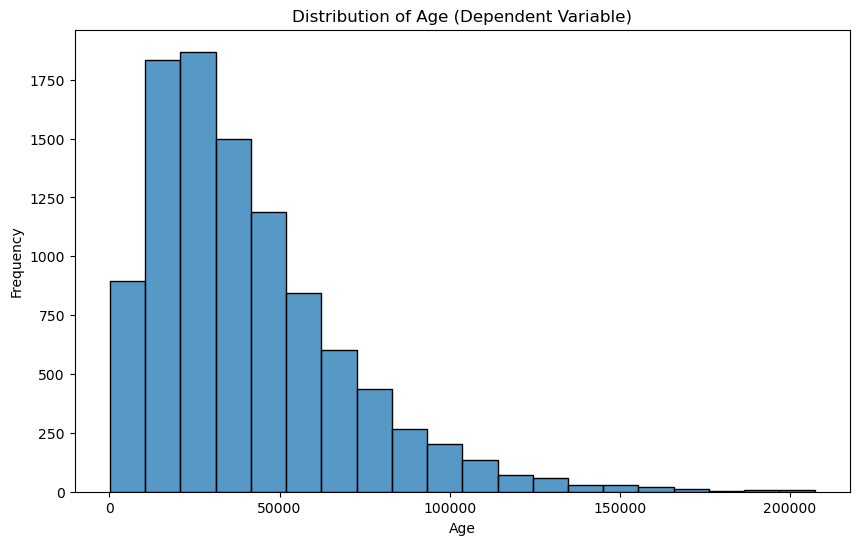

In [13]:
# Univariate visualization of the dependent variable (Y)
plt.figure(figsize=(10, 6))
sns.histplot(Y, bins=20)
plt.title('Distribution of Age (Dependent Variable)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

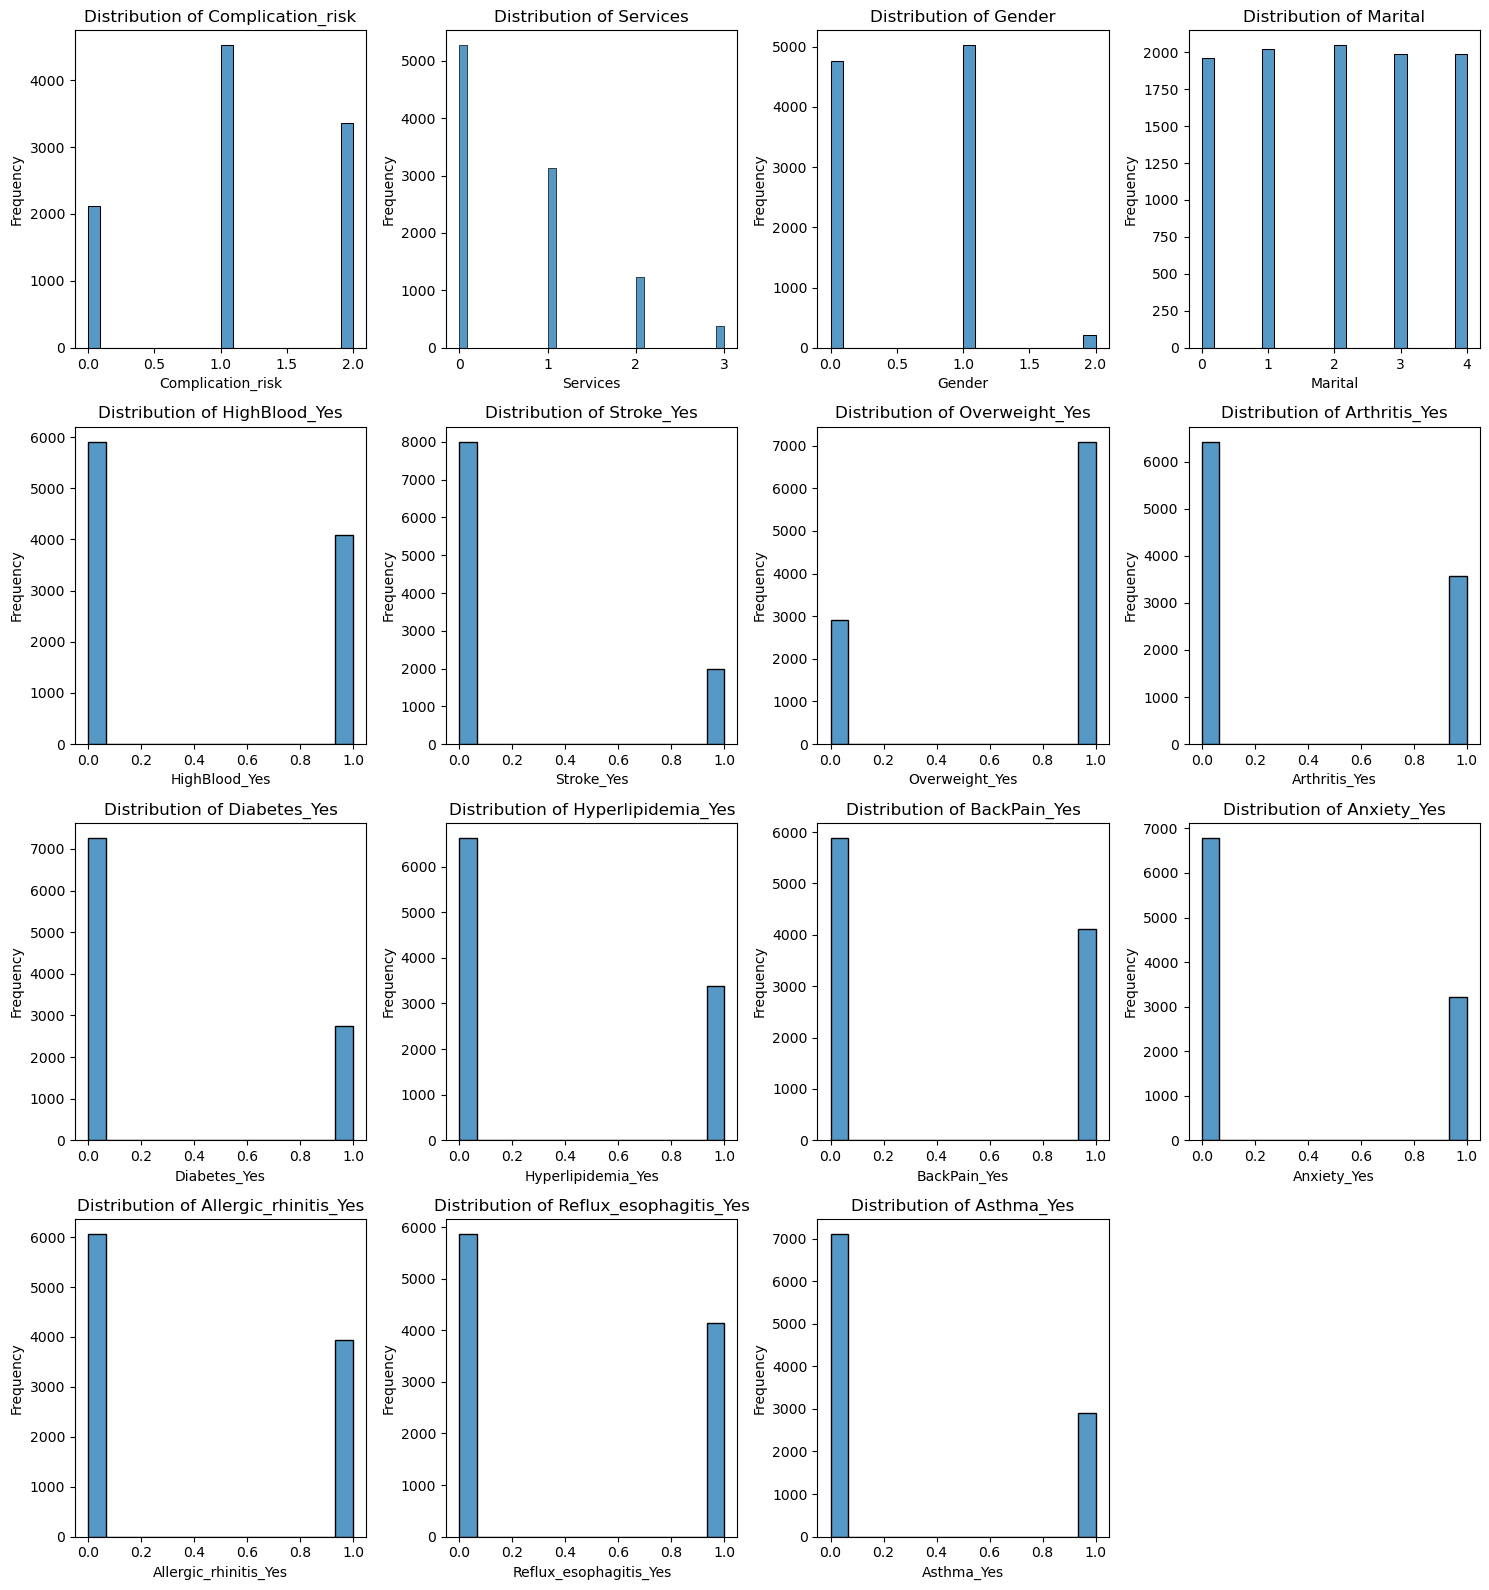

In [14]:
# univariate visualizations of independent variables
# Determine the number of rows and columns for subplots
num_cols = len(X.columns)
num_rows = (num_cols + 3) // 4  # Adjusted to ensure there are enough rows for all subplots

# Set figure size
plt.figure(figsize=(15, 4 * num_rows))

# Loop through each column in X
for i, column in enumerate(X.columns):
    # Create subplots
    plt.subplot(num_rows, 4, i + 1)
    
    # Plot the histogram
    sns.histplot(X[column])
    
    # Set title, xlabel, and ylabel
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

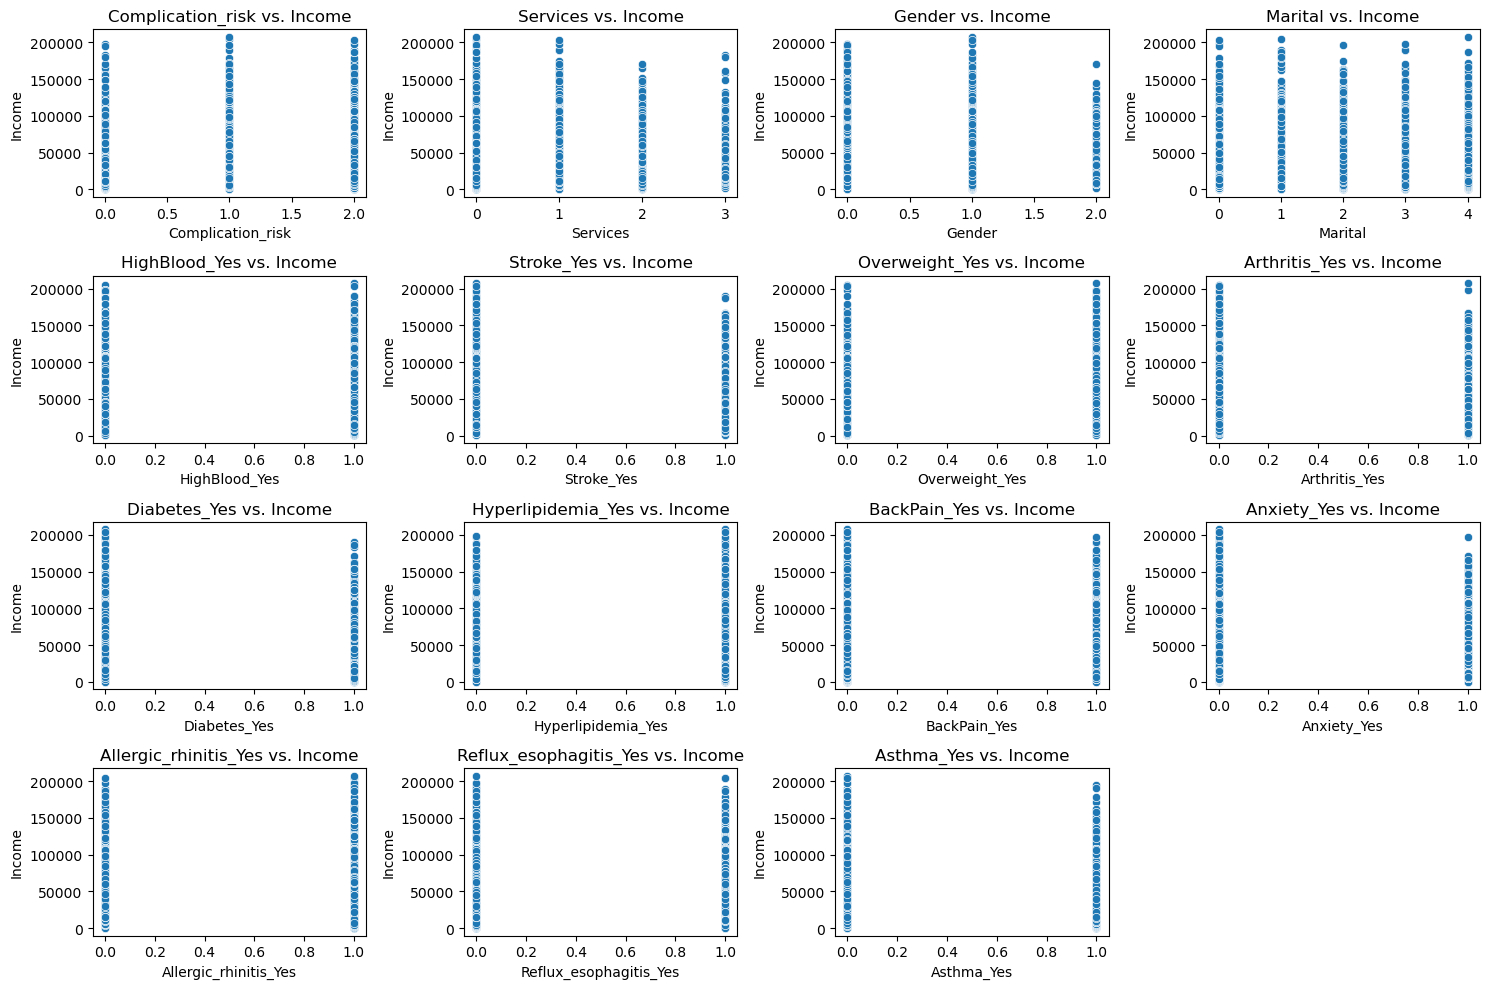

In [15]:
# Bivariate visualization of the dependent variable (Y) with selected independent variables
# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through each column in X
for i, column in enumerate(X.columns):
    # Create subplots in a 4x4 grid
    plt.subplot(4, 4, i + 1)
    
    # Plot the scatterplot
    sns.scatterplot(x=X[column], y=Y)
    
    # Set title, xlabel, and ylabel
    plt.title(f'{column} vs. Income')
    plt.xlabel(column)
    plt.ylabel('Income')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [16]:
# Write the DataFrame to a CSV file
medical.to_csv('cleaned_data.csv')

In [17]:
# Fit the OLS model
model = sm.OLS(Y, sm.add_constant(X)).fit()

# Display the summary of the initial OLS model
print("Initial Model Summary:Medical_cleaned")
print(model.summary())

Initial Model Summary:Ethereum_cleaned
                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6648
Date:                Tue, 03 Dec 2024   Prob (F-statistic):              0.821
Time:                        20:51:25   Log-Likelihood:            -1.1677e+05
No. Observations:               10000   AIC:                         2.336e+05
Df Residuals:                    9984   BIC:                         2.337e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

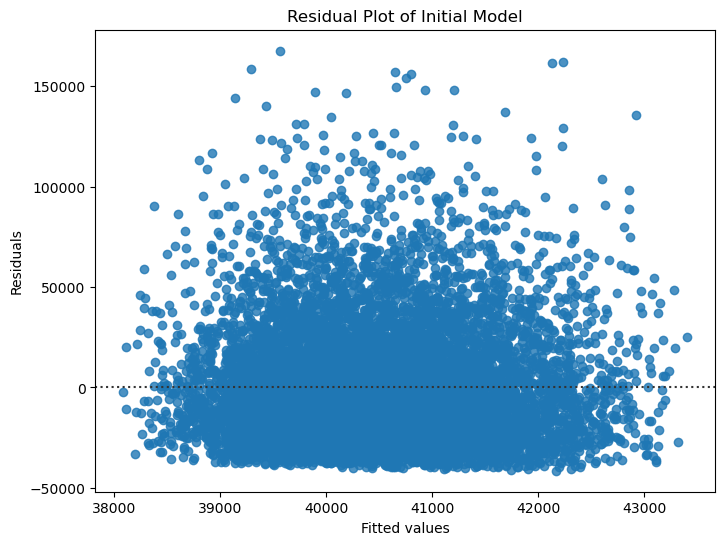


Residual Standard Error (Initial Model): 813865406.43

Regression Equation for Initial Model:
41071.45 (Intercept) + -50.82*Complication_risk + -135.20*Services + -116.86*Gender + -61.78*Marital + -51.73*HighBlood_Yes + 156.54*Stroke_Yes + -1174.19*Overweight_Yes + -323.52*Arthritis_Yes + -643.38*Diabetes_Yes + 522.83*Hyperlipidemia_Yes + 554.50*BackPain_Yes + -34.05*Anxiety_Yes + -64.82*Allergic_rhinitis_Yes + 935.91*Reflux_esophagitis_Yes + 394.24*Asthma_Yes + 813865406.43 (Error)


In [18]:
# Residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=model.fittedvalues, y=model.resid)
plt.title('Residual Plot of Initial Model')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Residual standard error
residual_std_error_initial = model.scale
print("\nResidual Standard Error (Initial Model):", round(residual_std_error_initial, 2))

# Regression equation for the initial model
print("\nRegression Equation for Initial Model:")
equation_components_initial = [f"{model.params['const']:.2f} (Intercept)"]
for feature in model.params.index[1:]:  # Exclude the intercept
    equation_components_initial.append(f"{model.params[feature]:.2f}*{feature}")
equation_initial = " + ".join(equation_components_initial) + f" + {round(residual_std_error_initial, 2)} (Error)"
print(equation_initial)


In [19]:
# Inital Model Regression equation for the initial model
print("\nRegression Equation for Initial Model:")
equation_components_initial = [f"{model.params['const']:.2f} (Intercept)"]
for feature in model.params.index[1:]:  # Exclude the intercept
    equation_components_initial.append(f"{model.params[feature]:.2f}*{feature}")
equation_initial = " + ".join(equation_components_initial) + f" + {round(residual_std_error_initial, 2)} (Error)"
print(equation_initial)


Regression Equation for Initial Model:
41071.45 (Intercept) + -50.82*Complication_risk + -135.20*Services + -116.86*Gender + -61.78*Marital + -51.73*HighBlood_Yes + 156.54*Stroke_Yes + -1174.19*Overweight_Yes + -323.52*Arthritis_Yes + -643.38*Diabetes_Yes + 522.83*Hyperlipidemia_Yes + 554.50*BackPain_Yes + -34.05*Anxiety_Yes + -64.82*Allergic_rhinitis_Yes + 935.91*Reflux_esophagitis_Yes + 394.24*Asthma_Yes + 813865406.43 (Error)


In [20]:
# Calculate VIF for all variables
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF for all variables
print("\nVariance Inflation Factor (VIF) for All Features:")
print(vif)


Variance Inflation Factor (VIF) for All Features:
                  Features       VIF
0        Complication_risk  2.812430
1                 Services  1.583964
2                   Gender  1.892779
3                  Marital  2.602600
4            HighBlood_Yes  1.629036
5               Stroke_Yes  1.226717
6           Overweight_Yes  2.895025
7            Arthritis_Yes  1.501036
8             Diabetes_Yes  1.346204
9       Hyperlipidemia_Yes  1.450851
10            BackPain_Yes  1.623347
11             Anxiety_Yes  1.427010
12   Allergic_rhinitis_Yes  1.578054
13  Reflux_esophagitis_Yes  1.628387
14              Asthma_Yes  1.373591


In [21]:
# Remove features with high p-values
high_pvalue_features = ['Complication_risk', 'Services', 'Gender', 'Marital', 'HighBlood_Yes',
                        'Stroke_Yes', 'Overweight_Yes', 'Arthritis_Yes',
                        'Hyperlipidemia_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Asthma_Yes']
X_reduced_pvalue = X.drop(high_pvalue_features, axis=1)
#'Diabetes_Yes'
# Fit the OLS model with reduced features (p-values)
reduced_model_pvalue = sm.OLS(Y, sm.add_constant(X_reduced_pvalue)).fit()


# Print Reduced Model Summary for p-values
print("\nReduced Model Summary (p-values):")
print(reduced_model_pvalue.summary())


Reduced Model Summary (p-values):
                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.544
Date:                Tue, 03 Dec 2024   Prob (F-statistic):              0.201
Time:                        20:51:25   Log-Likelihood:            -1.1677e+05
No. Observations:               10000   AIC:                         2.335e+05
Df Residuals:                    9996   BIC:                         2.336e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [22]:
# Model (p-value-based reduction):

Number of features: 3
Adjusted R-squared: 0.000

SyntaxError: invalid syntax (1048577499.py, line 3)

In [23]:
# Analyze the data set using the reduced linear regression model
# Compare initial and reduced linear regression models
# Model evaluation metric: Adjusted R-squared
initial_adj_r_squared = model.rsquared_adj
print("\nAdjusted R-squared (Initial Model):", initial_adj_r_squared)
# Used the p vlaue one
print("Adjusted R-squared (Reduced Model):", reduced_model_pvalue.rsquared_adj)


Adjusted R-squared (Initial Model): -0.0005030649060950854
Adjusted R-squared (Reduced Model): 0.00016322265530088753


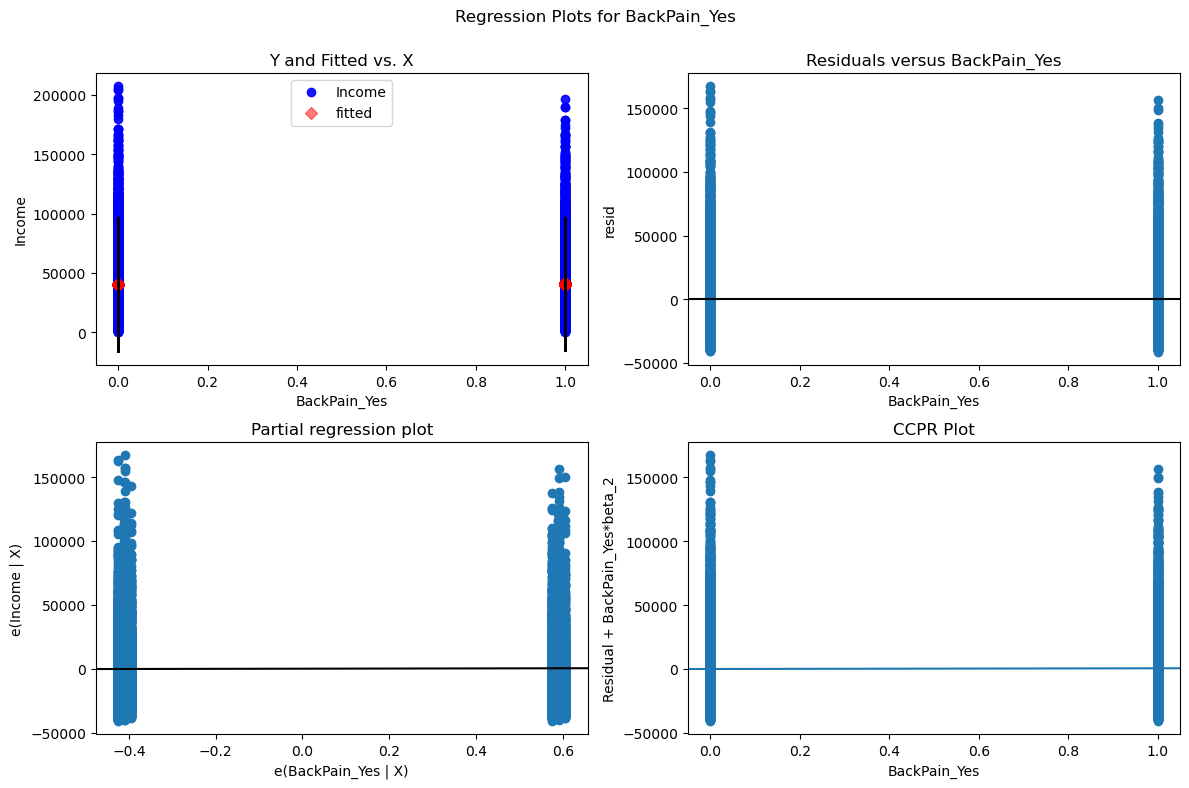

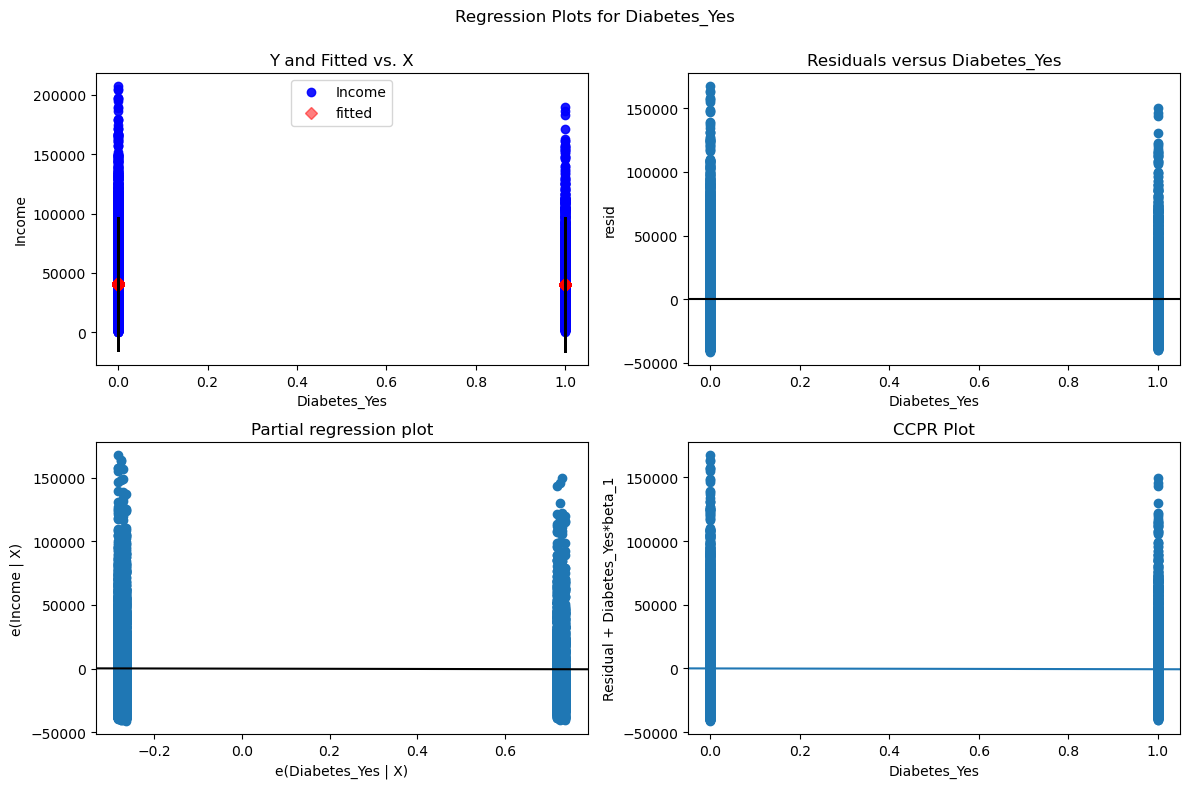

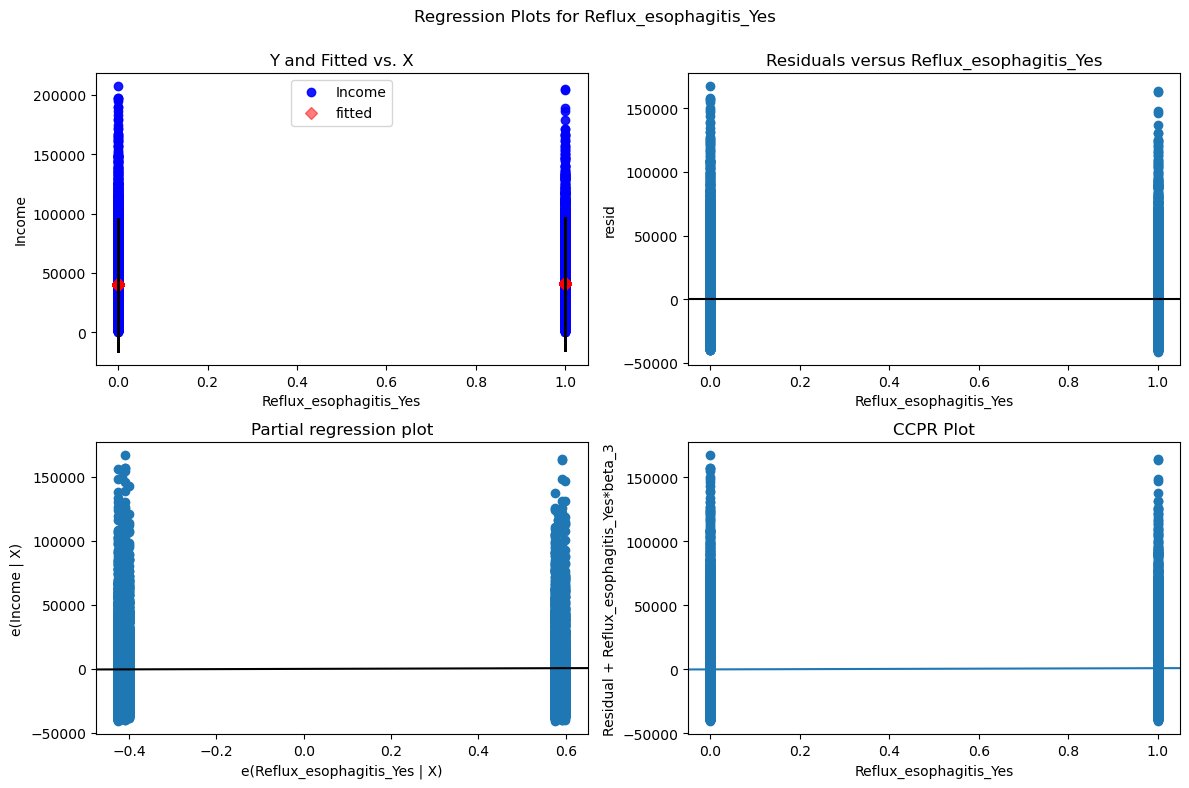

In [24]:
# Produce regression plots for 'BackPain_Yes'
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(reduced_model_pvalue, 'BackPain_Yes', fig=fig)
plt.show()

# Produce regression plots for 'Diabetes_Yes'
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(reduced_model_pvalue, 'Diabetes_Yes', fig=fig)
plt.show()


# Produce regression plots for 'Reflux_esophagitis_Yes'
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(reduced_model_pvalue, 'Reflux_esophagitis_Yes', fig=fig)

plt.show()

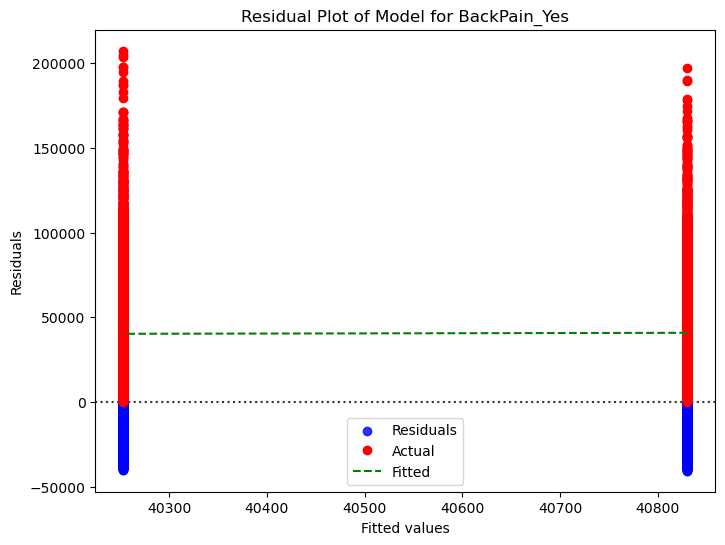

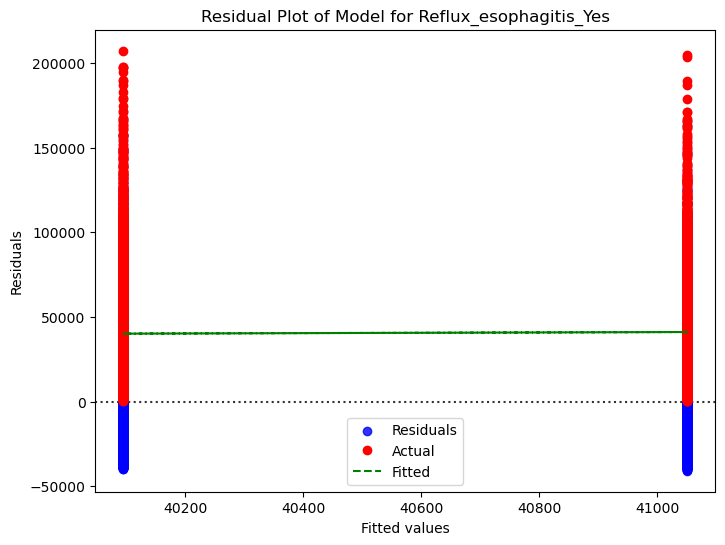

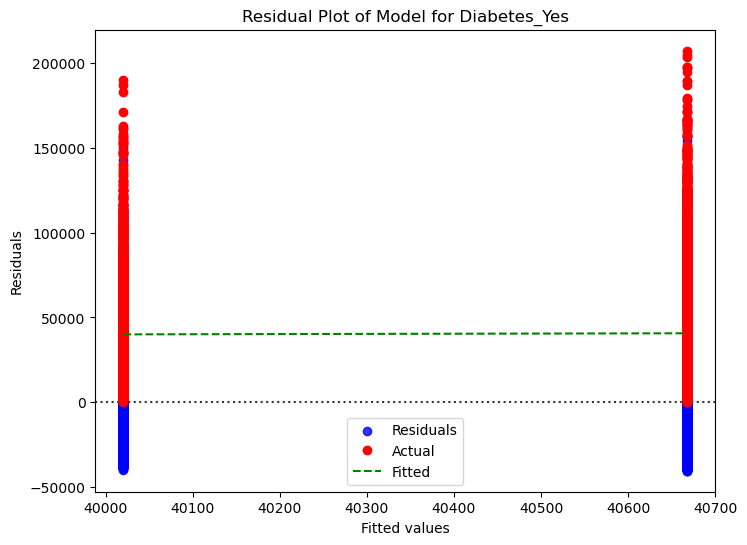

In [25]:
# Residual plot for Back pain
backpain_model = sm.OLS(Y, sm.add_constant(X['BackPain_Yes'])).fit()

plt.figure(figsize=(8, 6))
sns.residplot(x=backpain_model.fittedvalues, y=backpain_model.resid, color='blue', label='Residuals')
plt.plot(backpain_model.fittedvalues, Y, 'ro', label='Actual')
plt.plot(backpain_model.fittedvalues, backpain_model.fittedvalues, color='green', linestyle='--', label='Fitted')
plt.title('Residual Plot of Model for BackPain_Yes')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Residual plot for Reflux
reflux_model = sm.OLS(Y, sm.add_constant(X['Reflux_esophagitis_Yes'])).fit()

plt.figure(figsize=(8, 6))
sns.residplot(x=reflux_model.fittedvalues, y=reflux_model.resid, color='blue', label='Residuals')
plt.plot(reflux_model.fittedvalues, Y, 'ro', label='Actual')
plt.plot(reflux_model.fittedvalues, reflux_model.fittedvalues, color='green', linestyle='--', label='Fitted')
plt.title('Residual Plot of Model for Reflux_esophagitis_Yes')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.legend()
plt.show() 

# Residual plot for Diabetes
diabetes_model = sm.OLS(Y, sm.add_constant(X['Diabetes_Yes'])).fit()

plt.figure(figsize=(8, 6))
sns.residplot(x=diabetes_model.fittedvalues, y=diabetes_model.resid, color='blue', label='Residuals')
plt.plot(diabetes_model.fittedvalues, Y, 'ro', label='Actual')
plt.plot(diabetes_model.fittedvalues, diabetes_model.fittedvalues, color='green', linestyle='--', label='Fitted')
plt.title('Residual Plot of Model for Diabetes_Yes')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [26]:
# Residual standard error
residual_std_error = reduced_model_pvalue.scale
print("\nResidual Standard Error (Reduced Model):", round(residual_std_error, 2))

# Regression equation for the reduced model
print("\nRegression Equation for Reduced Model:")
equation_components = [f"{reduced_model_pvalue.params['const']:.2f} (Intercept)"]
for feature in reduced_model_pvalue.params.index[1:]:  # Exclude the intercept
    equation_components.append(f"{reduced_model_pvalue.params[feature]:.2f}*{feature}")
equation = " + ".join(equation_components) + f" + {round(residual_std_error, 2)} (Error)"
print(equation)


Residual Standard Error (Reduced Model): 813323410.69

Regression Equation for Reduced Model:
40045.84 (Intercept) + -630.79*Diabetes_Yes + 553.77*BackPain_Yes + 942.08*Reflux_esophagitis_Yes + 813323410.69 (Error)


In [27]:
# Interpretation of the coefficients
print("\nInterpretation of Coefficients:")
for feature, coefficient in reduced_model_pvalue.params.items():
    if feature != 'const':  # Exclude the intercept
        print(f"The coefficient of {feature} is {coefficient:.2f}, indicating that for each unit increase in {feature}, the Income changes by {coefficient:.2f}.")


Interpretation of Coefficients:
The coefficient of Diabetes_Yes is -630.79, indicating that for each unit increase in Diabetes_Yes, the Income changes by -630.79.
The coefficient of BackPain_Yes is 553.77, indicating that for each unit increase in BackPain_Yes, the Income changes by 553.77.
The coefficient of Reflux_esophagitis_Yes is 942.08, indicating that for each unit increase in Reflux_esophagitis_Yes, the Income changes by 942.08.
